# I've been playing a lot of Animal Crossing: New Horizons lately.
<img style="float:left; padding-right: 35px;" src="https://cdn.mobilesyrup.com/wp-content/uploads/2020/03/animal-crossing-fishing-gif.gif">
<br><br>

<p style="font-size: large;">One of the core activities in the game is fishing.</p> It's simple enough: you find a dark silhouette in any of the numerous water sources on your island, toss your fishing rod, and wait for the fish to boop the bobber. Only, when the fish does bite, it doesn't always sink the bobber right away. In order to catch the fish, you have to wait for the fishhook to sink, which can happen anywhere from the first to the fifth boop.

## If you were able to predict beforehand how many "boops" it might take to get a solid bite, fishing would suddenly become a whole lot easier.
<p style="font-size: large;">So I decided to investigate the correlation between boop-count and several other in-game factors. It's time to put on my detective hat and get fishing!</p> [image of me wearing that detective hat in game that im too lazy to import rn]

#### Let's get some basics set up first:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

FILEPATH = "../datasets/feesh.csv"

df = pd.read_csv(FILEPATH, index_col=0)

sns.set(style="white", context="notebook", palette="deep")
COLOR_COLUMNS = ["#66C2FF", "#5CD6D6", "#00CC99", "#85E085", "#FFD966", "#FFB366", "#FFB3B3", "#DAB3FF", "#C2C2D6"]
sns.set_palette(palette=COLOR_COLUMNS, n_colors=4)

# What exactly's in this "feesh.csv" file we just imported?
<p style="font-size: large;">To gather evidence for this study, I caught 200 fish over the course of a few days in April.</p> I caught every fish that I saw, so that any favoritism based on conditions or size would not skew the data. For each fish, I recorded the information described below. Since I collected the data myself, I can personally attest that there should not be any unfilled columns for any of the rows, and no cleansing should be necessary. However, adding additional, specialized columns might prove helpful.

The dataset contains 7 relevant columns: <strong>Fish, Boops, Size, Time, Location, Weather, and Value.</strong>
### Fish
This is the name of the fish (or similar creature) that was caught. Animal Crossing has 80 unique kinds of "fish," plus various other trash items that can be caught. In-game, fish-adjacent creatures such as snapping turtles and frogs are treated the same as fish, and thus will be considered fish for the purposes of this analysis. 
### Boops
As explained previously, a fish "boops" the fish hook between 1 and 5 times before sinking it. The connections between this number and external variables such as value and weather, if any, will be the primary subject of investigation. 
### Size
A fish appears in the water as a silhouette before it is caught. These shadows range in size from extra small to extra large. There is, in fact, a size above extra large, but fish of that size are extremely rare and were not encountered during this study. The size of the fish's silhouette is reliably determined by the species of fish. A sea bass, for example, will always appear as an extra large shadow. 
### Time
Certain fish can only be caught at certain times of the day, or certain times of the year. Though it is not apparant from the dataset, all fish were caught during the month of April. Times are recorded in 24-hour time notation.
### Location
Fish of certain kinds are only available in certain locations. Though there is some overlap (a clifftop river, for example, can host all of the same fish as a normal river, along with fish unique to that location), there is a clear divide between freshwater fish (found in ponds and all river varieties) and saltwater fish (found in the sea and off the pier). Trash can be found everywhere that fish can be. 
### Weather
Some fish are only available in certain weather, such as rain. There is also a general assumption among players that rarer fish appear more commonly in the rain, though I have not been able to find concrete evidence of this online. I will attempt to investigate this with my limited dataset, but dividing the data by weather is likely to create unreasonably small (and therefore unreliable) subsets of data. 
### Value
Though players often refer to "rare" fish, there is no codified method of determining fish rariy. I have decided that the closest approximation for rarity, without knowing the in-game spawn probabilities for each fish, is value; that is, the number of bells (currency) they can be sold for at the standard general store. I will use these numbers to create rarity categories, which I will expand on later. 

## Let's take a glance at the dataframe:

In [2]:
df

,Fish,Boops,Size,Time,Location,Weather,Value
ID,,,,,,,
1,zebra turkeyfish,3,medium,11:14,sea,clear,500
2,guppy,5,x small,11:17,river,clear,1300
3,sea horse,5,x small,11:24,sea,clear,1100
4,olive flounder,4,large,11:25,sea,clear,800
5,bluegill,3,small,11:27,river,clear,180
...,...,...,...,...,...,...,...
196,stone,3,small,21:48,sea,clear,75
197,tadpole,2,x small,21:49,sea,clear,100
198,dab,2,medium,21:50,sea,clear,300


## What about boops?
Fishing in Animal Crossing ultimately comes down to timing. Without any indication of when the fishhook will sink, catching a fish is purely reactionary. As soon as the fish bites, you have to quickly press 'A' to reel it in. Otherwise, it will slip off your hook and swim away. Beyond that, there isn't much strategy. However, a better understanding of the probabilities behind fishing could add more strategy to what otherwise would be a game of reflexes. <p style="font-size: large;">If I can look at a fish's shadow and know from environmental conditions that it is most likely to sink the fishook on, for example, the third boop, I would be able to plan my timing accordingly.</p>
## What can we use this data for?
<p style="font-size: large;">Well, lots of things!</p> We primarily want to investigate boop-count, but we can also see where certain fish appear, or dial-in on certain aspects of fishing. To demonstrate how we can use this set to look at more specific categories, let's take a look at only the Red Snappers I caught.

In [3]:
df.loc[df['Fish'] == 'red snapper']

,Fish,Boops,Size,Time,Location,Weather,Value
ID,,,,,,,
17,red snapper,1,large,11:48,sea,clear,3000
23,red snapper,3,large,12:00,sea,clear,3000
35,red snapper,2,large,13:15,sea,clear,3000
60,red snapper,1,large,14:01,sea,rain,3000
67,red snapper,1,large,14:22,sea,rain,3000
109,red snapper,3,large,2:49,sea,clear,3000
124,red snapper,1,large,15:17,pier,clear,3000
125,red snapper,1,large,15:18,sea,clear,3000
147,red snapper,4,large,15:52,sea,clear,3000


Easy enough! I can see from this that I caught 11 Red Snappers. They all have the same value, size, and are from saltwater locations—as expected.

In fact, let's create another column to sort by saltwater or freshwater locations. This can give us a better understanding of species frequency. We'll call it "Water Type" and it will have two options: "saltwater" or "freshwater".

In [4]:
def _water_type(data):
    if data == "river" or data == "river mouth" or data == "clifftop river" or data == "pond":
        return "freshwater"
    elif data == "sea" or data == "pier":
        return "saltwater"
    else:
        return "ERROR"  # this shouldn't happen! hopefully...

df["Water Type"] = df["Location"].apply(_water_type)
df.head()

,Fish,Boops,Size,Time,Location,Weather,Value,Water Type
ID,,,,,,,,
1,zebra turkeyfish,3,medium,11:14,sea,clear,500,saltwater
2,guppy,5,x small,11:17,river,clear,1300,freshwater
3,sea horse,5,x small,11:24,sea,clear,1100,saltwater
4,olive flounder,4,large,11:25,sea,clear,800,saltwater
5,bluegill,3,small,11:27,river,clear,180,freshwater


Great! Let's make sure none of those water types met the error condition:

In [5]:
df.loc[df['Water Type'] == 'ERROR'].count()

Fish          0
Boops         0
Size          0
Time          0
Location      0
Weather       0
Value         0
Water Type    0
dtype: int64

Good to go. Now we can easily, for instance, separate all the saltwater fish! 

In [6]:
df.loc[df['Water Type'] == 'saltwater'].head()

,Fish,Boops,Size,Time,Location,Weather,Value,Water Type
ID,,,,,,,,
1,zebra turkeyfish,3,medium,11:14,sea,clear,500,saltwater
3,sea horse,5,x small,11:24,sea,clear,1100,saltwater
4,olive flounder,4,large,11:25,sea,clear,800,saltwater
6,sea bass,2,x large,11:30,sea,clear,400,saltwater
7,olive flounder,1,large,11:31,sea,clear,800,saltwater


We don't need that quite yet, but it'll come up again later. 
## What we really want to focus on right now is boops. Is it really random?
Let's take a preliminary look with a bar graph of all 200 catches. We can use a handy histogram function that might look familiar from earlier in this class!

<BarContainer object of 5 artists>

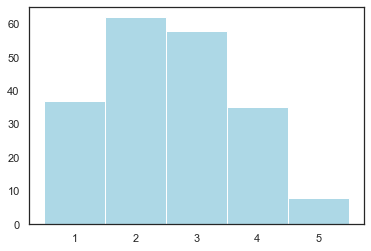

In [7]:
def custom_hist(ls, interval):
    hist_ls_dict = dict()
    ls = sorted(ls)
    min_ls = np.min(ls)
    max_ls = np.max(ls)
    
    current_min = int(np.floor(min_ls))
    current_max = current_min + interval
    
    for j in ls:
        while j >= current_max:
            current_min = current_max
            current_max += interval
        hist_ls_dict[current_min] = hist_ls_dict.get(current_min, 0) + 1 
    return hist_ls_dict

hist_dict = custom_hist(df['Boops'].values, 1)
plt.bar(hist_dict.keys(), hist_dict.values(), 1, color='lightblue')

## That certainly doesn't look random!
In fact, at a glance it appears to resemble a right-skewed distribution. Maybe a hfgakhjg no im going to sleep